# Reconstructions vs. satellite data comparison: 

June 2020  
Katie Brennan  

In [2]:
import sys,os,copy

In [3]:
import sys
import numpy as np
import pickle

from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [4]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_utils_kb/')
import Sice_utils as siutils 

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [74]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(ce_utils)

<module 'commonera_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/commonera_utils.py'>

In [75]:
def sub_arctic_plot(fig,ax,VAR1,LAT,LON,TITLE1,MAX1,colorbar=True,extent=True):
    var1, lon1 = add_cyclic_point(VAR1, coord=LON)
    new_lon2d, new_lat2d = np.meshgrid(lon1, LAT)
    if extent is True: 
        ax.set_extent([-150, 140, 50, 90], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor=(1, 1, 1))
    cs = ax.pcolormesh(new_lon2d, new_lat2d, var1, 
                       vmin=-MAX1, vmax=MAX1, cmap=plt.cm.RdBu_r, 
                       transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.5)
    if colorbar is True:
        plt.colorbar(cs, ax=ax)
    ax.set_title(TITLE1)

In [117]:
def load_recon_grid(): 
    lalo_dir = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/'
    lalo_savename = '20CR_grid.pkl'

    grid = pickle.load(open(lalo_dir+lalo_savename,'rb'))
    
    return grid

In [76]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

In [77]:
output_dir = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_a = 'sic_ccsm4_anrecon_1979_2000_fullLMRdbv1_1_inf1_loc25000_iter0.pkl'

niter = 10

[sic_lalo_allit_a, tas_lalo_allit_a, sic_ens_var_allit_a, 
 nobs_allit_a, sia_ens_allit_a, sie_ens_allit_a, Ye_assim_allit_a, 
 Ye_assim_coords_allit_a, Xb_inflate_allit_a, recon_years, 
 proxy_assim_loc_allit_a] = ce_utils.load_recon_allit(output_dir,output_file_a,niter)

In [78]:
output_file_b = 'sic_ccsm4_anrecon_1979_2000_fullLMRdbv1_1_inf2_6_loc15000_iter0.pkl'

[sic_lalo_allit_b, tas_lalo_allit_b, sic_ens_var_allit_b, 
 nobs_allit_b, sia_ens_allit_b, sie_ens_allit_b, Ye_assim_allit_b, 
 Ye_assim_coords_allit_b, Xb_inflate_allit_b, recon_years, 
 proxy_assim_loc_allit_b] = ce_utils.load_recon_allit(output_dir,output_file_b,niter)

In [79]:
output_file_c = 'sic_ccsm4_anrecon_1979_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

[sic_lalo_allit_c, tas_lalo_allit_c, sic_ens_var_allit_c, 
 nobs_allit_c, sia_ens_allit_c, sie_ens_allit_c, 
 Ye_assim_allit_c, Ye_assim_coords_allit_c, Xb_inflate_allit_c, 
 recon_years] = ce_utils.load_recon_allit(output_dir,output_file_c,niter,prox_loc=False)

In [89]:
output_file_d = 'sic_ccsm4_anrecon_1979_2000_fullLMRdbv0_4_inf1_loc25000_iter0.pkl'

[sic_lalo_allit_d, tas_lalo_allit_d, sic_ens_var_allit_d, 
 nobs_allit_d, sia_ens_allit_d, sie_ens_allit_d, Ye_assim_allit_d, 
 Ye_assim_coords_allit_d, Xb_inflate_allit_d, recon_years, 
 proxy_assim_loc_allit_d] = ce_utils.load_recon_allit(output_dir,output_file_d,niter)

In [90]:
# LOAD ANNUAL SATELLITE DATA: 
[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(2000)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

In [91]:
sie_ens_allit_2d_a = np.reshape(sie_ens_allit_a,(sie_ens_allit_a.shape[0],
                                             sie_ens_allit_a.shape[1]*sie_ens_allit_a.shape[2]))
sie_ens_anom_allit_a = sie_ens_allit_2d_a - np.nanmean(sie_ens_allit_2d_a,axis=0)
sie_ensmn_anom_allit_a = np.nanmean(sie_ens_anom_allit_a,axis=1)

sie_97_5_allit_a = np.percentile(sie_ens_anom_allit_a,97.5,axis=1)
sie_2_5_allit_a = np.percentile(sie_ens_anom_allit_a,2.5,axis=1)

[ce_sie_a,corr_sie_a,var_sie_sat_a,var_sie_recon_a] = rrutils.find_ce_corr(sie_ensmn_anom_allit_a, 
                                                                   fet_sie_anom,fet_time,
                                                                   np.array(recon_years),1979,1999)

In [92]:
sie_ens_allit_2d_b = np.reshape(sie_ens_allit_b,(sie_ens_allit_b.shape[0],
                                             sie_ens_allit_b.shape[1]*sie_ens_allit_b.shape[2]))
sie_ens_anom_allit_b = sie_ens_allit_2d_b - np.nanmean(sie_ens_allit_2d_b,axis=0)
sie_ensmn_anom_allit_b = np.nanmean(sie_ens_anom_allit_b,axis=1)

sie_97_5_allit_b = np.percentile(sie_ens_anom_allit_b,97.5,axis=1)
sie_2_5_allit_b = np.percentile(sie_ens_anom_allit_b,2.5,axis=1)

[ce_sie_b,corr_sie_b,var_sie_sat_b,var_sie_recon_b] = rrutils.find_ce_corr(sie_ensmn_anom_allit_b, 
                                                                   fet_sie_anom,fet_time,
                                                                   np.array(recon_years),1979,1999)

In [93]:
sie_ens_allit_2d_c = np.reshape(sie_ens_allit_c,(sie_ens_allit_c.shape[0],
                                                 sie_ens_allit_c.shape[1]*sie_ens_allit_c.shape[2]))
sie_ens_anom_allit_c = sie_ens_allit_2d_c - np.nanmean(sie_ens_allit_2d_c,axis=0)
sie_ensmn_anom_allit_c = np.nanmean(sie_ens_anom_allit_c,axis=1)

sie_97_5_allit_c = np.percentile(sie_ens_anom_allit_c,97.5,axis=1)
sie_2_5_allit_c = np.percentile(sie_ens_anom_allit_c,2.5,axis=1)

[ce_sie_c,corr_sie_c,var_sie_sat_c,var_sie_recon_c] = rrutils.find_ce_corr(sie_ensmn_anom_allit_c, 
                                                                   fet_sie_anom,fet_time,
                                                                   np.array(recon_years),1979,1999)

In [94]:
sie_ens_allit_2d_d = np.reshape(sie_ens_allit_d,(sie_ens_allit_d.shape[0],
                                             sie_ens_allit_d.shape[1]*sie_ens_allit_d.shape[2]))
sie_ens_anom_allit_d = sie_ens_allit_2d_d - np.nanmean(sie_ens_allit_2d_d,axis=0)
sie_ensmn_anom_allit_d = np.nanmean(sie_ens_anom_allit_d,axis=1)

sie_97_5_allit_d = np.percentile(sie_ens_anom_allit_d,97.5,axis=1)
sie_2_5_allit_d = np.percentile(sie_ens_anom_allit_d,2.5,axis=1)

[ce_sie_d,corr_sie_d,var_sie_sat_d,var_sie_recon_d] = rrutils.find_ce_corr(sie_ensmn_anom_allit_d, 
                                                                   fet_sie_anom,fet_time,
                                                                   np.array(recon_years),1979,1999)

Text(0.14,0.14,'(Satellite, DA recon): R$^{2}$ = 0.56, CE = 0.49')

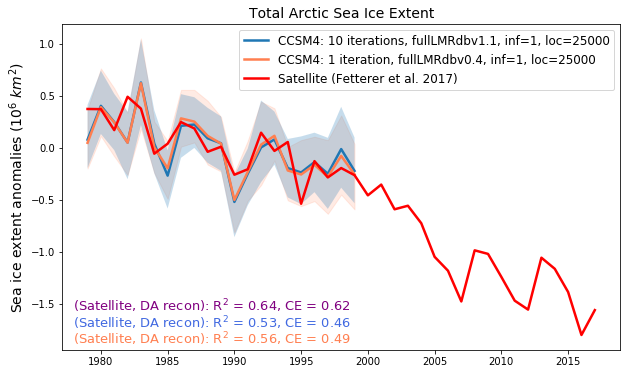

In [97]:
plt.figure(figsize=(10,6))

# plt.fill_between(recon_years,sie_2_5_allit_b,sie_97_5_allit_b,alpha=0.2, color='g')
# plt.fill_between(recon_years,sie_2_5_allit_c,sie_97_5_allit_c,alpha=0.15, color='purple')
plt.fill_between(recon_years,sie_2_5_allit_d,sie_97_5_allit_d,alpha=0.15, color='coral')
plt.fill_between(recon_years,sie_2_5_allit_a,sie_97_5_allit_a,alpha=0.25)

plt.plot(recon_years,sie_ensmn_anom_allit_a,
         label='CCSM4: 10 iterations, fullLMRdbv1.1, inf=1, loc=25000',linewidth=2.5)
# plt.plot(recon_years,sie_ensmn_anom_allit_b, color='g',
#          label='CCSM4: 10 iterations, fullLMRdbv1.1, inf=2.6, loc=15000',linewidth=2.5)
# plt.plot(recon_years,sie_ensmn_anom_allit_c, color='purple',
#          label='CCSM4: 10 iterations, pages2kv1, inf=2.6, loc=15000',linewidth=2.5)
plt.plot(recon_years,sie_ensmn_anom_allit_d, color='coral',
         label='CCSM4: 1 iteration, fullLMRdbv0.4, inf=1, loc=25000',linewidth=2.5)
plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2.5)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=12)
#plt.ylim(7,13.1,1)
ce_corr_plt_a = (('(Satellite, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_a**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_a))
ce_corr_plt_b = (('(Satellite, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_b**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_b))
ce_corr_plt_c = (('(Satellite, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_c**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_c))
ce_corr_plt_d = (('(Satellite, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_d**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_d))
plt.gcf().text(0.14, 0.175, ce_corr_plt_a , fontsize=13,color='royalblue')
# plt.gcf().text(0.14, 0.215, ce_corr_plt_b , fontsize=13,color='g')
plt.gcf().text(0.14, 0.215, ce_corr_plt_c , fontsize=13,color='purple')
plt.gcf().text(0.14, 0.14, ce_corr_plt_d , fontsize=13,color='coral')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

# savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
#            'analysis/figures/sic_ccsm4_anrecon_1979_2000_fullLMRdbv1_1_inf1_loc25000_10iterations/')
# savename = 'tot_sie_v_sat_10it_1979_2017.png'
# plt.savefig(savedir+savename)

### Plotting Proxy Locations Assimilated: 

In [147]:
prox_info = {'Tree Rings_WidthPages2':{'color':'g','label':'Tree Rings_WidthPages2'},
             'Tree Rings_WidthBreit':{'color':'lawngreen','label':'Tree Rings_WidthBreit'}, 
             'Tree Rings_WoodDensity':{'color':'mediumseagreen','label':'Tree Rings_WoodDensity'}, 
             'Tree Rings_Isotopes':{'color':'yellowgreen','label':'Tree Rings_Isotopes'}, 
             'Corals and Sclerosponges_d18O':{'color':'salmon','label':'Corals and Sclerosponges_d18O'},
             'Corals and Sclerosponges_SrCa':{'color':'orangered','label':'Corals and Sclerosponges_SrCa'}, 
             'Corals and Sclerosponges_Rates':{'color':'red','label':'Corals and Sclerosponges_Rates'}, 
             'Ice Cores_d18O':{'color':'lightskyblue','label':'Ice Cores_d18O'}, 
             'Ice Cores_dD':{'color':'aqua','label':'Ice Cores_dD'}, 
             'Ice Cores_Accumulation':{'color':'dodgerblue','label':'Ice Cores_Accumulation'}, 
             'Lake Cores_Varve':{'color':'brown','label':'Lake Cores_Varve'}, 
             'Lake Cores_Misc':{'color':'goldenrod','label':'Lake Cores_Misc'}, 
             'Bivalve_d18O':{'color':'darkorchid','label':'Bivalve_d18O'}}

In [148]:
output_file_c

'sic_ccsm4_anrecon_1979_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


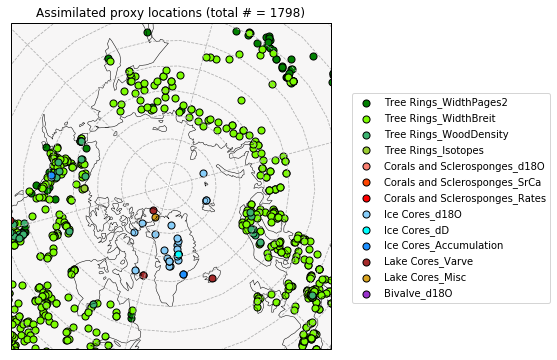

In [149]:
# Plot assimilated proxies: Arctic 
nexp = proxy_assim_loc_allit_d['iter 0']
grid = load_recon_grid()

prox_present = nexp.keys()
nprox=0
for loc in prox_present: 
    nprox = nprox + nexp[loc]['lat'].shape[0]

handle_list = []
label_list = []

fig,ax = plt.subplots(1,1, figsize=(6, 6), subplot_kw = proj)
sub_arctic_plot(fig,ax,np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Assimilated proxy locations (total # = '+str(nprox)+')',
                1, colorbar=False)
for loc in prox_present: 
    ax.scatter([nexp[loc]['lon']],[nexp[loc]['lat']],
               color=prox_info[loc]['color'],transform=ccrs.PlateCarree(), 
               label=prox_info[loc]['label'], edgecolors='k',s=50)

handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax.legend(handle_list, label_list,bbox_to_anchor=(1.05, 0.8))

#fig.suptitle('SIC Truth vs Reconstruction: 1681-1850', fontsize=14)
#plt.tight_layout(rect=(0,0,1,0.93))

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/sic_ccsm4_anrecon_0_2000_fullLMRdbv1_1_inf2_6_loc15000_a/'
# savename = 'assim_proxies_arc_2090.png'
# plt.savefig(savedir+savename)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


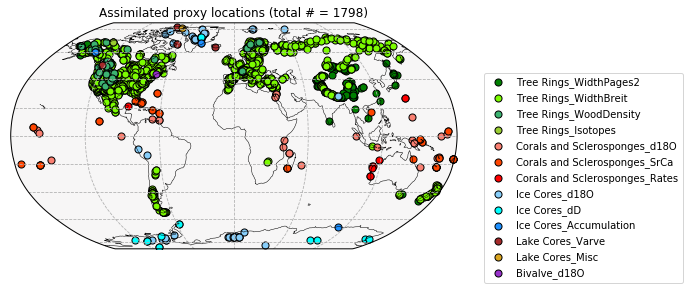

In [150]:
# Plot assimilated proxies: Global 
nexp = proxy_assim_loc_allit_d['iter 0']
grid = load_recon_grid()

handle_list = []
label_list = []

prox_present = nexp.keys()
nprox=0
for loc in prox_present: 
    nprox = nprox + nexp[loc]['lat'].shape[0]

fig,ax = plt.subplots(1,1, figsize=(8,6), subplot_kw = dict(projection=ccrs.Robinson()))
sub_arctic_plot(fig,ax,np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Assimilated proxy locations (total # = '+str(nprox)+')',1, 
                colorbar=False, extent=False)
for loc in prox_present: 
    ax.scatter([nexp[loc]['lon']],[nexp[loc]['lat']],
               color=prox_info[loc]['color'],transform=ccrs.PlateCarree(), 
               label=prox_info[loc]['label'], edgecolors='k',s=50)

handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax.legend(handle_list, label_list,bbox_to_anchor=(1.05, 0.8))

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/sic_ccsm4_anrecon_0_2000_fullLMRdbv1_1_inf2_6_loc15000_a/'
# savename = 'assim_proxies_global_2090.png'
# plt.savefig(savedir+savename)